#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import csv
import pandas as pd

#### Reading the dataset

In [2]:
dataframe=pd.read_csv("C:/Users/mehdi/OneDrive/Documents/ESILV 4A/Sem1_bis/python_projet/spambase_2.csv")
dataframe

,make,address,all,3d,our,over,remove,internet,order,mail,...,;,(,[,!,$,#,run_length_av,run_length_longest,run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
x=dataframe.iloc[0:4601,0:57]
y=dataframe.iloc[0:4601, 57]
x.shape, y.shape

((4601, 57), (4601,))

#### Visualize the name of each column

In [4]:
print(dataframe.iloc[0,])

make                    0.000
address                 0.640
all                     0.640
3d                      0.000
our                     0.320
over                    0.000
remove                  0.000
internet                0.000
order                   0.000
mail                    0.000
receive                 0.000
will                    0.640
people                  0.000
report                  0.000
addresses               0.000
free                    0.320
business                0.000
email                   1.290
you                     1.930
credit                  0.000
your                    0.960
font                    0.000
0                       0.000
money                   0.000
hp                      0.000
hpl                     0.000
george                  0.000
650                     0.000
lab                     0.000
labs                    0.000
telnet                  0.000
857                     0.000
data                    0.000
415       

#### Mean value of each colum

In [5]:
xmed=0
for i in range(0,4601):
    x1=dataframe.iloc[i,0:57]
    xmed=xmed+x1
xfin=xmed/4601
xfin ##This is the mean value of each column



make                    0.104553
address                 0.213015
all                     0.280656
3d                      0.065425
our                     0.312223
over                    0.095901
remove                  0.114208
internet                0.105295
order                   0.090067
mail                    0.239413
receive                 0.059824
will                    0.541702
people                  0.093930
report                  0.058626
addresses               0.049205
free                    0.248848
business                0.142586
email                   0.184745
you                     1.662100
credit                  0.085577
your                    0.809761
font                    0.121202
0                       0.101645
money                   0.094269
hp                      0.549504
hpl                     0.265384
george                  0.767305
650                     0.124845
lab                     0.098915
labs                    0.102852
telnet    

#### PCA

                         PC0       PC1       PC2       PC3       PC4  \
make               -0.048514  0.140491 -0.044063 -0.108922  0.054498   
address            -0.009774 -0.018839 -0.009730  0.048744 -0.054851   
all                -0.053562  0.145701 -0.007425 -0.048202  0.101242   
3d                 -0.007687  0.015495  0.009462  0.046194 -0.040562   
our                -0.043895  0.121526 -0.132425  0.074594  0.253579   
over               -0.053221  0.153272  0.015989 -0.061069 -0.067960   
remove             -0.055797  0.150504 -0.129944  0.022050 -0.045833   
internet           -0.040426  0.124929 -0.041060 -0.103711 -0.027716   
order              -0.053958  0.203109  0.149984 -0.070500  0.070260   
mail               -0.025708  0.133396  0.072642 -0.102651  0.005595   
receive            -0.058629  0.193114 -0.085509 -0.106122  0.064923   
will               -0.023001  0.055482 -0.075569 -0.062808  0.346539   
people             -0.041985  0.108015 -0.000512 -0.088843 -0.04

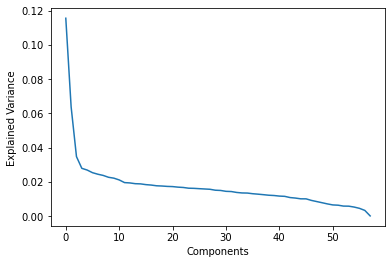

In [6]:
from sklearn.decomposition import PCA
import pandas
df_normalized=(dataframe - dataframe.mean()) / dataframe.std()
pca = PCA(n_components=dataframe.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=dataframe.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

#### Creating the train and test sets

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3082, 57)
(1519, 57)
(3082,)
(1519,)


#### Scaling of the sets

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

#### First attempt at a prediction without modifying parameters

In [60]:
from sklearn import svm
svr=svm.SVR()
svr.fit(x_train,y_train)
pred1 = svr.predict(x_train)
from sklearn.model_selection import cross_val_score
cross_val_score(svr,x_test,y_test).mean()

## 70% is too low to be acceptable, other models might fit the problem better

0.7035765871275772

#### Testing another model

In [51]:
from sklearn import svm
svc=svm.SVC()
svc.fit(x_train,y_train)
pred1 = svc.predict(x_train)
from sklearn.model_selection import cross_val_score
cross_val_score(svc,x_test,y_test).mean()

## The score is already better by a large margin, so we can keep this model and improve it

0.9229763765850268

#### Gridsearch in order to improve the score

In [61]:
parameters={ 'C' : [0.5,1],
           'gamma' : [0.5,0.2] }
grid=GridSearchCV(svc, parameters, n_jobs=-1)
grid.fit(x_train,y_train)
print(grid.best_score_, grid.best_estimator_)

0.8578848218232334 SVC(C=1, gamma=0.2)


In [62]:
def test_hyperparametres(hyperparametres):
    grid=GridSearchCV(svm.SVC(), hyperparametres, n_jobs=-1)
    grid.fit(x_train,y_train)
    print(grid.best_score_,grid.best_estimator_)
    return grid.best_score_,grid.best_estimator_

## General function used to do a GridSearch

#### New and more complex GridSearch

In [63]:
hyperparametres={ 'C' : [0.5,1,2,5,4,6],
           'gamma' : [0.5,0.2,0.1,0.05,0.01,0.005,0.007,0.003] }
test_hyperparametres(hyperparametres)

## It looks like the best parameters are C=5, gamma=0.005, which give us 93% precision.

0.9325022627291671 SVC(C=5, gamma=0.005)


(0.9325022627291671, SVC(C=5, gamma=0.005))

#### KNN Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
pred1 = neigh.predict(x_train)
from sklearn.model_selection import cross_val_score
cross_val_score(neigh,x_test,y_test).mean()

0.8867661108216085

#### Let's improve our KNN model

In [53]:
## Let's modify weights in order to take into account how far the neighbors are.

l_scores=[]
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i,weights="distance")
    neigh.fit(x_train,y_train)
    pred = neigh.predict(x_train)
    l_scores.append(cross_val_score(neigh,x_test,y_test).mean())
l_scores

[0.870307886051763,
 0.870307886051763,
 0.8940094667361473,
 0.8940094667361473,
 0.8986234149730763,
 0.9005970991836026,
 0.8986277575125934,
 0.8966519020323085,
 0.8913844015980545,
 0.894673875282265,
 0.8913822303282959,
 0.8907243355914538,
 0.8880949279138439,
 0.8927001910717387,
 0.8927067048810144,
 0.8927045336112558,
 0.8887506513809276,
 0.890070783394129,
 0.8900729546638875]

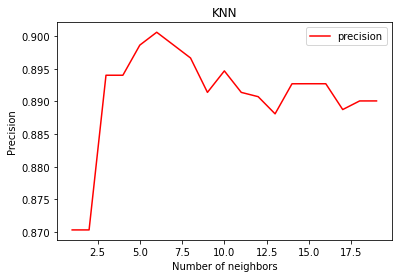

In [54]:
x=np.arange(1,20)
plt.plot(x,l_scores,label="precision",c="red")
plt.title('KNN')
plt.xlabel('Number of neighbors')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [64]:
## As we can see, our precision stays around 89% and is best with 10 neighbors, at 90%.

#### Random Forest

In [55]:
## First attempt at a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
pred1 = clf.predict(x_train)
cross_val_score(clf,x_test,y_test).mean()

0.8880905853743268

#### Improving the performance of our Random Forest

In [56]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred1 = clf.predict(x_train)
cross_val_score(clf,x_test,y_test).mean()

0.9453621677957269

In [77]:
## Let's modify different parameters such as the maximum depth or the max_features 
## (which is the number of features to consider when looking for the best split; If “log2”, then max_features=log2(n_features))

l_scores=[]
for i in range(50,1000,50):
    clf = RandomForestClassifier(max_depth=i, max_features="log2")
    clf.fit(x_train, y_train)
    pred = clf.predict(x_train)
    l_scores.append(cross_val_score(clf,x_test,y_test).mean())
l_scores

[0.9466671009206185,
 0.9479915754733369,
 0.9453578252562098,
 0.9453578252562098,
 0.9453513114469342,
 0.947327166927219,
 0.946020062532569,
 0.9447064443286433,
 0.944039864512767,
 0.9473315094667362,
 0.9479828903943026,
 0.9479872329338196,
 0.9447021017891263,
 0.9473358520062533,
 0.9473358520062533,
 0.9473358520062533,
 0.9473249956574605,
 0.949307364947021,
 0.9440420357825255]

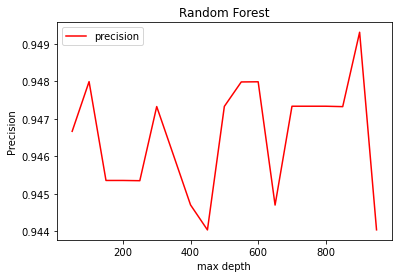

In [78]:
x=np.arange(1,20)*50
plt.plot(x,l_scores,label="precision",c="red")
plt.title('Random Forest')
plt.xlabel('max depth')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
## As we can see, the best precision is around 95%, which makes the random forest our best model.